# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Gautam Ghai  <br>
Roll Number: 2020101020

### Dataset

Use the code below to load the Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

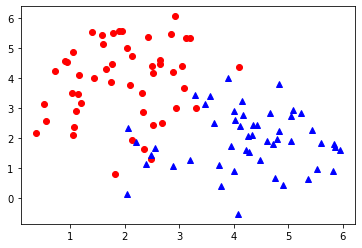

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

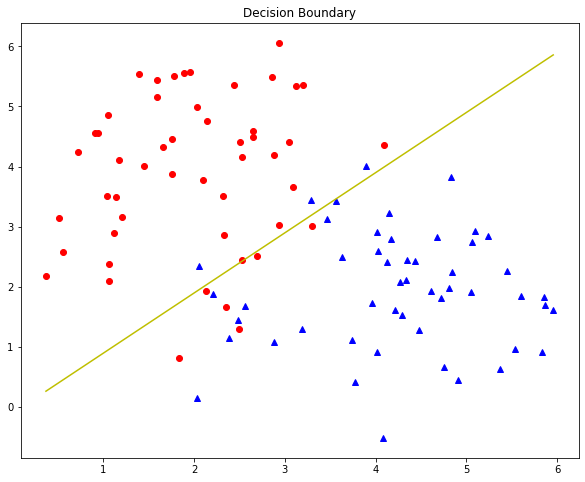

In [4]:
def sigmoid(a):
    return 1.0/(1 + np.exp(-a))
def lossFunction(y, y_hat):
    loss = -np.mean((y*np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss
def gradients(X, y, y_hat):
    
    # X - Input
    # y - true value
    # y_hat - predicted value
    # w - weights
    # b - bias 
    
    # m - number of training examples.
    m = X.shape[0]
    
       
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 

    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    return dw, db
def plot_decision_boundary(X, w, b):
    
    # The Line is y=mx+c
    # Equate mx+c = w.X + b
    # Find m and c
    
    c = -b/w[1]
    m = -w[0]/w[1]    
    x2 = m*[min(X[:,0]), max(X[:,0])] + c
    
    
    fig = plt.figure(figsize=(10,8))
    plt.title('Decision Boundary')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
    plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')    
    plt.plot([min(X[:,0]), max(X[:,0])], x2, 'y-')
    
def normalize(X):
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X
def train(X, y, bs, epochs, lr):

    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
   
    m, n = X.shape
    
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    
    x = normalize(X)
    
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Update w and b
            w = w- lr*dw
            b = b- lr*db
        
        
        l = lossFunction(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    
    return w, b, losses
def predict(X):
        
    x = normalize(X)
    # Calculating predictions i.e y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
   
    pred_class = []
    
    for i in preds:
        if i > 0.5:
            pred_class.append(1)
        else:
            pred_class.append(0)
    
    return np.array(pred_class)

# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
plot_decision_boundary(X, w, b)

### Questions

1) Explain the approach of Logistic Regression.<br>
2) What is the loss function used?<br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.

##### Ans1.
Approach of logistic regression -  Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. It is a predictive analysis algorithm and based on the concept of probability. It is used to find the probability that an instance belongs to a particular class or not. It is a parametric algorithm and the parameters are estimated from the training data. It is a linear classifier, which means that it finds a linear decision boundary between the possible outputs. 
##### Ans2.
Loss function used is log likelihood function whose formula is  -  
`L = Σ(yi * log(pi) + (1 - yi) * log(1 - pi)) where pi = 1 / (1 + e^(-z)) and z = Σ(wi * xi) + b`
##### Ans3. 
No, we cannot use MSE as loss function because MSE is used for regression problems and logistic regression is a classification problem.